In [2]:
#Preparing the model from rotten tomatoes data set 

#Steps to follow
#Data preparation: Obtain the Rotten Tomatoes dataset and import it into a data analysis tool such as Pandas or Numpy. Preprocess the data by cleaning it, removing any missing values, and transforming it into a suitable format for modeling.

#Exploratory data analysis: Explore the data to gain insights into the distribution of the target variable, the relationship between the features, and any other patterns in the data. This can help inform the choice of modeling techniques.

#Feature engineering: Extract relevant features from the movie reviews, such as word frequency, sentiment, or n-grams. This can help improve the performance of the model.

#Model selection: Select a suitable machine learning algorithm for the task, such as logistic regression, support vector machines, or a neural network. Evaluate the performance of several algorithms and choose the best one based on accuracy and computational efficiency.

#Model training: Train the chosen model on the preprocessed data, using techniques such as cross-validation to avoid overfitting and ensure good performance on unseen data.

#Model evaluation: Evaluate the performance of the model using metrics such as accuracy, precision, recall, and F1 score. If necessary, fine-tune the model to improve its performance.

In [3]:
import pandas as pd

In [4]:
# Load the Rotten Tomatoes dataset from a csv file
df = pd.read_csv('rotten_tomatoes_critic_reviews.csv')

# Check for missing values
print(df.isnull().sum())

# Remove rows with missing values
df.dropna(inplace=True)

# Check for duplicates
print(df.duplicated().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)

# Transform the data into a suitable format for modeling
df['review_content'] = df['review_content'].apply(lambda x: x.lower()) # convert all text to lowercase
df['review_type'] = df['review_type'].astype('category') # convert sentiment to categorical data type

# Store the preprocessed data
df.to_csv('rotten_tomatoes_reviews_preprocessed.csv', index=False)


rotten_tomatoes_link         0
critic_name              18529
top_critic                   0
publisher_name               0
review_type                  0
review_score            305936
review_date                  0
review_content           65806
dtype: int64
79226


In [5]:
#EDA

In [6]:
#The following first loads the preprocessed Rotten Tomatoes dataset into a Pandas dataframe and calculates some basic statistics about the data. 
#Then it creates visualizations to help understand the distribution of the target variable (sentiment), the distribution of the review text length, and the relationship between review text length and sentiment. 
#Finally, it performs a word frequency analysis to identify the 20 most common words in the review text.

In [7]:
import matplotlib.pyplot as plt

# Load the preprocessed Rotten Tomatoes dataset
df = pd.read_csv('rotten_tomatoes_reviews_preprocessed.csv')

Fresh     429354
Rotten    244154
Name: review_type, dtype: int64


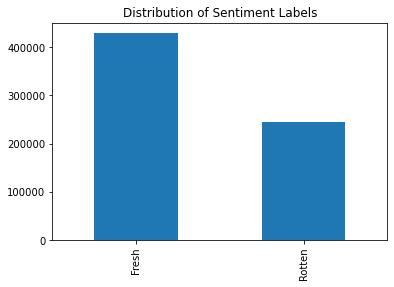

In [8]:
# Distribution of sentiment labels
sentiment_counts = df['review_type'].value_counts()
print(sentiment_counts)
sentiment_counts.plot(kind='bar', title='Distribution of Sentiment Labels')
plt.show()

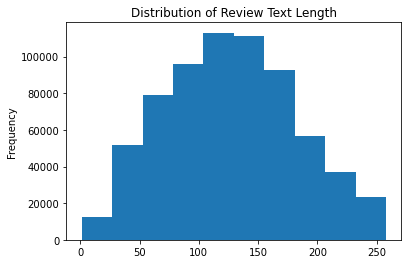

In [9]:
# Distribution of review text length
review_lengths = df['review_content'].apply(len)
review_lengths.plot(kind='hist', title='Distribution of Review Text Length')
plt.show()

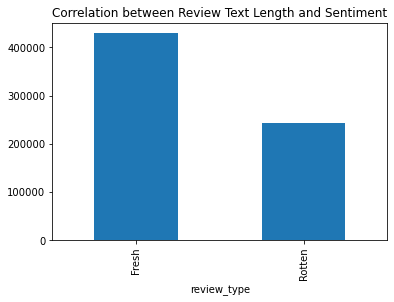

In [10]:
# Correlation between review text length and sentiment
review_lengths_by_sentiment = df.groupby('review_type')['review_content'].apply(len)
review_lengths_by_sentiment.plot(kind='bar', title='Correlation between Review Text Length and Sentiment')
plt.show()

In [11]:
# Word frequency analysis
from collections import Counter



In [12]:

# Word frequency analysis
review_words = [word for review in df['review_content'].str.split() for word in review]
word_counts = Counter(review_words)
most_common_words = word_counts.most_common(20)
print(most_common_words)


[('the', 729953), ('a', 522000), ('and', 435535), ('of', 423834), ('to', 301733), ('is', 255572), ('in', 197604), ('that', 164387), ('it', 153551), ('as', 125953), ('but', 124945), ('with', 122294), ('for', 107926), ('this', 106612), ("it's", 91789), ('an', 87117), ('its', 84122), ('film', 78874), ('on', 68669), ('be', 64667)]


In [13]:
#Feature engineering
import nltk

In [14]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
# Load the preprocessed Rotten Tomatoes dataset
df = pd.read_csv('rotten_tomatoes_reviews_preprocessed.csv')

# Text normalization
stop_words = set(stopwords.words("english"))
stemmer = SnowballStemmer("english")
def normalize_text(text):
    text = text.lower() # Convert to lowercase
    text = [stemmer.stem(word) for word in text.split() if word not in stop_words] # Stemming and removing stop words
    return " ".join(text)
df['review_content'] = df['review_content'].apply(normalize_text)

# TF-IDF
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_df=0.5)
reviews_tfidf = vectorizer.fit_transform(df['review_content'])

# Sentiment analysis
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['review_type'] = encoder.fit_transform(df['review_type'])


In [16]:
#spliting the dataset

In [17]:

from sklearn.model_selection import train_test_split

# Extract the feature engineered data and target variable
X = df.drop('review_type', axis=1)
y = df['review_type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [18]:
## training and evaluating several ML algorithms

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Prepare the data for modeling
X = df['review_content']
y = df['review_type']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Vectorize the text data using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train a logistic regression model
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)
log_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the accuracy of the logistic regression model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Accuracy of logistic regression model:", accuracy_log_reg)




Accuracy of logistic regression model: 0.792089204317679


In [20]:
# Train a support vector machine model
##svm = SVC(kernel='linear')
#svm.fit(X_train, y_train)

# Make predictions on the test data
#y_pred_svm = svm.predict(X_test)

# Evaluate the accuracy of the SVM model
#accuracy_svm = accuracy_score(y_test, y_pred_svm)
#print("Accuracy of SVM model:", accuracy_svm)

In [21]:
#from sklearn.model_selection import GridSearchCV

# Define the range of hyperparameters to search
#param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}

# Train the SVM model with cross-validation
#svm = SVC()
#grid_search = GridSearchCV(svm, param_grid, cv=5)
#grid_search.fit(X_train, y_train)

# Use the best hyperparameters found by the grid search
#best_svm = grid_search.best_estimator_

# Make predictions on the test data
#y_pred_svm = best_svm.predict(X_test)

# Evaluate the accuracy of the SVM model
#accuracy_svm = accuracy_score(y_test, y_pred_svm)
#print("Accuracy of SVM model:", accuracy_svm)


In [25]:
print(df.head())

  rotten_tomatoes_link       critic_name  top_critic           publisher_name  \
0            m/0814255      Ben McEachen       False  Sunday Mail (Australia)   
1            m/0814255      Nick Schager       False           Slant Magazine   
2            m/0814255  Bill Goodykoontz        True         Arizona Republic   
3            m/0814255    Jordan Hoffman       False                      UGO   
4            m/0814255      Jim Schembri        True      The Age (Australia)   

   review_type review_score review_date  \
0            0        3.5/5  2010-02-09   
1            1          1/4  2010-02-10   
2            0        3.5/5  2010-02-10   
3            0            B  2010-02-10   
4            0          3/5  2010-02-10   

                                      review_content  
0  whether audienc get behind lightn thief hard p...  
1  harri potter knockoff come transpar slapdash w...  
2  perci jackson great movie, good one, trot kern...  
3                                 

In [30]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the preprocessed Rotten Tomatoes dataset
#df = pd.read_csv('rotten_tomatoes_reviews_preprocessed.csv')

# Prepare the data for modeling
X = df['review_content']
y = df['review_type']


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Vectorize the text data using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


# Train a decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt = dt.predict(X_test)

# Evaluate the accuracy of the decision tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy of decision tree model:", accuracy_dt)



Accuracy of decision tree model: 0.6894181229677362


In [31]:
# Train a random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf.predict(X_test)

# Evaluate the accuracy of the random forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy of random forest model:", accuracy_rf)


Accuracy of random forest model: 0.7634333565945569


In [32]:
# Train a simple feedforward neural network
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

# Make predictions on the test data
y_pred_mlp = mlp.predict(X_test)

# Evaluate the accuracy of the neural network model
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print("Accuracy of neural network model:", accuracy_mlp)

Accuracy of neural network model: 0.7510578907514365


In [33]:
## choose the model